# **Projeto de Análise de Risco no Transporte Público**

In [30]:
# Imports
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
sns.set_theme(style="whitegrid")

## Load data

In [32]:
data = pd.read_csv('data/tfl_bus_safety.csv')
data

,year,date_of_incident,route,operator,group_name,bus_garage,borough,injury_result_description,incident_event_type,victim_category,victims_sex,victims_age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
3,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,None London Borough,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly
4,2015,2015-01-01,6,Metroline,Metroline,Garage Not Available,Westminster,Reported Minor Injury - Treated at Hospital,Onboard Injuries,Pedestrian,Female,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...
23153,2018,2018-09-01,(blank),East London,Stagecoach,West Ham,Newham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23154,2018,2018-09-01,(blank),London United,London United,Hounslow,Not specified,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult
23155,2018,2018-09-01,(blank),London United,London United,Park Royal,Harrow,Injuries treated on scene,Slip Trip Fall,Operational Staff,Male,Adult
23156,2018,2018-09-01,(blank),London United,London United,Shepherds Bush,Hammersmith & Fulham,Injuries treated on scene,Personal Injury,Bus Driver,Male,Adult


In [33]:
print(f'O dataset possui {data.shape[0]} linhas e {data.shape[1]} colunas')

O dataset possui 23158 linhas e 12 colunas


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       23158 non-null  int64 
 1   date_of_incident           23158 non-null  object
 2   route                      23158 non-null  object
 3   operator                   23158 non-null  object
 4   group_name                 23158 non-null  object
 5   bus_garage                 23158 non-null  object
 6   borough                    23158 non-null  object
 7   injury_result_description  23158 non-null  object
 8   incident_event_type        23158 non-null  object
 9   victim_category            23158 non-null  object
 10  victims_sex                23158 non-null  object
 11  victims_age                23158 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.1+ MB


Não há dados nulos e a grande maioria dos atributos são do tipo object.

### Entendendo as colunas do dataset:

- **year**: Ano do acidente
- **date_of_incident**: Data exata do acidente com dia, mês e ano
- **route**: Rota do transporte público
- **operator**: Operador do transporte público
- **group_name**: Provavelmente esse é o nome do grupo que é responsável pela operação do transporte público
- **bus_garage**: Garagem do ônibus
- **borough**: Distrito, provavelmente de onde o acidente ocorreu
- **injury_result_description**: Descrição do resultado da lesão
- **incident_event_type**: Tipo de evento do incidente
- **victim_category**: Categoria da vítima no incidente
- **victims_sex**: Sexo das vítimas
- **victims_age**: Idade das vítimas


### Qual a quantidade de valores únicos por atributo?

In [35]:
for col in data.columns:
    print(f'{col} :: {data[col].nunique()}')

year :: 4
date_of_incident :: 45
route :: 612
operator :: 25
group_name :: 14
bus_garage :: 84
borough :: 35
injury_result_description :: 4
incident_event_type :: 10
victim_category :: 17
victims_sex :: 3
victims_age :: 5


## Feature engineering

Irei trabalhar nos dados de data para gerar novas features de dia e mês.

In [36]:
# Removendo a coluna 'year' para usra os dados da coluna 'date_of_incident'
data = data.drop(labels='year', axis=1)

In [37]:
# Transformando os dados de data em formato de datetime
data['date_of_incident'] = pd.to_datetime(data['date_of_incident'])

In [38]:
# Gerando novas variáveis para análises futuras
data['year'] = data['date_of_incident'].dt.year
data['mont'] = data['date_of_incident'].dt.month
data['day'] = data['date_of_incident'].dt.day

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23158 entries, 0 to 23157
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_of_incident           23158 non-null  datetime64[ns]
 1   route                      23158 non-null  object        
 2   operator                   23158 non-null  object        
 3   group_name                 23158 non-null  object        
 4   bus_garage                 23158 non-null  object        
 5   borough                    23158 non-null  object        
 6   injury_result_description  23158 non-null  object        
 7   incident_event_type        23158 non-null  object        
 8   victim_category            23158 non-null  object        
 9   victims_sex                23158 non-null  object        
 10  victims_age                23158 non-null  object        
 11  year                       23158 non-null  int32         
 12  mont

## Análises dos dados para responder as perguntas do projeto

### 1. **Qual a quantidade de incidentes por gênero?**

In [40]:
incidents_by_gender = sqldf(
    '''
    SELECT victims_sex, COUNT(route) as Quantidade
    FROM data
    GROUP BY "victims_sex"
    '''
)

print(incidents_by_gender)

  victims_sex  Quantidade
0      Female       11847
1        Male        7709
2     Unknown        3602


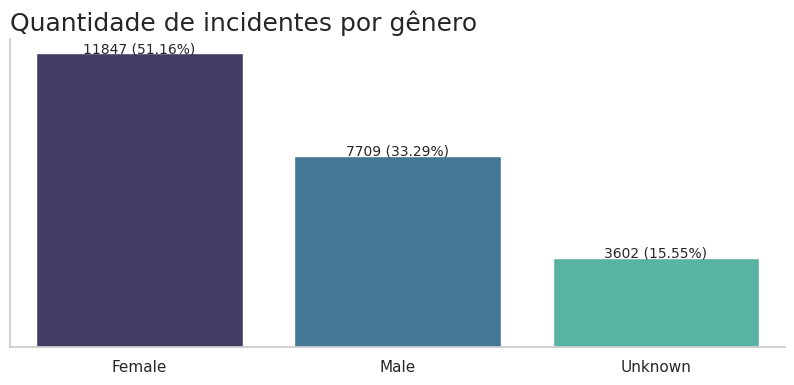

In [41]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.barplot(data=incidents_by_gender,
                 x='victims_sex',
                 y='Quantidade',
                 palette='mako',
                 hue='victims_sex')

ax.set_title('Quantidade de incidentes por gênero', loc='left', fontsize=18)
ax.set_xlabel('Gênero').set_visible(False)
ax.set_ylabel('Quantidade').set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.tick_params(labelleft = False)
ax.grid(False)

total = incidents_by_gender['Quantidade'].sum()

for i in range(incidents_by_gender.shape[0]):
    value = incidents_by_gender['Quantidade'][i]
    percent = value / total
    ax.text(i, value, f'{value} ({percent*100:.2f}%)',
           fontsize=10, ha='center')

plt.show()

Mais de 50% dos acidentes ocorrem com pessoas do sexo feminino.

### 2. **Qual faixa etária esteve mais envolvida nos incidentes?**

In [42]:
incidents_by_age = sqldf(
    '''
    SELECT victims_age, COUNT(route) as Quantidade
    FROM data
    GROUP BY "victims_age"
    '''
)

print(incidents_by_age)

  victims_age  Quantidade
0       Adult       10754
1       Child        2181
2     Elderly        2769
3     Unknown        7135
4       Youth         319


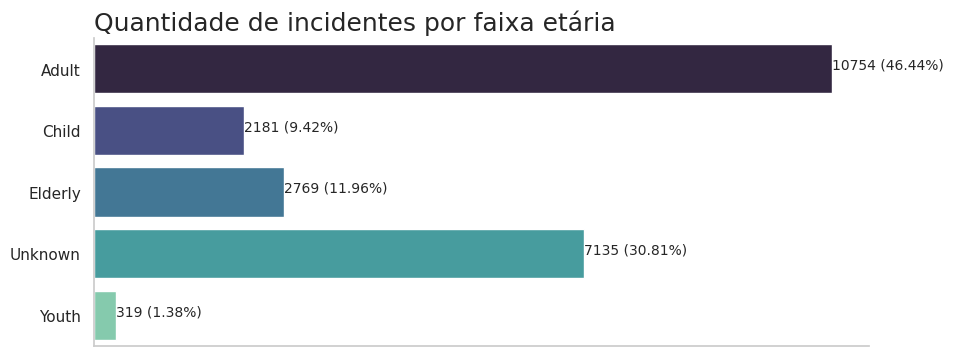

In [43]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.barplot(data=incidents_by_age,
                 y='victims_age',
                 x='Quantidade',
                 palette='mako',
                 hue='victims_age',
                 orient='h')

ax.set_title('Quantidade de incidentes por faixa etária', loc='left', fontsize=18)
ax.set_xlabel('Quantidade').set_visible(False)
ax.set_ylabel('Faixa etária').set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.tick_params(labelleft = True)
ax.tick_params(labelbottom = False)
ax.grid(False)

total = incidents_by_age['Quantidade'].sum()

for i in range(incidents_by_age.shape[0]):
    value = incidents_by_age['Quantidade'][i]
    percent = value / total
    ax.text(value, i, f'{value} ({percent*100:.2f}%)', fontsize=10)

plt.show()

A faixa etária mais envolvida em acidentes é a adulta, com 46% dos casos.

Em 31% dos acidentes a faixa etária é desconhecida.

### 3. **Qual o percentual de incidentes por tipo de evento (Incident EventType)?**

In [44]:
incidents_by_type = sqldf(
    '''
    SELECT incident_event_type, COUNT(route) as Quantidade
    FROM data
    GROUP BY "incident_event_type"
    '''
)

print(incidents_by_type)

       incident_event_type  Quantidade
0  Activity Incident Event         114
1                  Assault         590
2       Collision Incident        4166
3                     Fire           6
4         Onboard Injuries        6563
5          Personal Injury        4596
6                  Robbery           3
7  Safety Critical Failure          66
8           Slip Trip Fall        6981
9    Vandalism Hooliganism          73


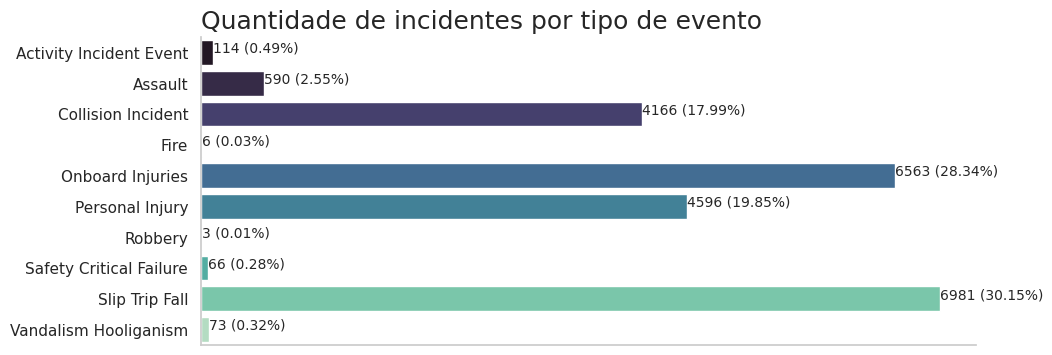

In [45]:
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.barplot(data=incidents_by_type,
                 y='incident_event_type',
                 x='Quantidade',
                 palette='mako',
                 hue='incident_event_type',
                 orient='h')

ax.set_title('Quantidade de incidentes por tipo de evento', loc='left', fontsize=18)
ax.set_xlabel('Quantidade').set_visible(False)
ax.set_ylabel('Evento').set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.tick_params(labelleft = True)
ax.tick_params(labelbottom = False)
ax.grid(False)

total = incidents_by_type['Quantidade'].sum()

for i in range(incidents_by_type.shape[0]):
    value = incidents_by_type['Quantidade'][i]
    percent = value / total
    ax.text(value, i, f'{value} ({percent*100:.2f}%)', fontsize=10)

plt.show()

30.15% dos eventos são de 'Slip Trip Fall', que signifca uma queda por escorregão ou tropeço.

28.34% são eventos de lesão a bordo e 17.99 são acidentes por colisão.

Vou olhar as descrições desses acidentes mais comuns para ter uma ideia da gravidade dos casos.

In [123]:
injury_description = data[['day', 'incident_event_type', 'injury_result_description']].groupby(['incident_event_type', 'injury_result_description']).count()
injury_description = injury_description.rename(columns={'day':'count'})

# Calculate percentage for each injury description for each incident event type
injury_description_percent = injury_description.groupby(level=0).apply(lambda x: 100 * x / x.sum())

injury_description['percent'] = injury_description_percent.values

# unidex by 1 level
injury_description = injury_description.unstack(level=1)

In [124]:
injury_description['percent']

injury_result_description,Fatal,Injuries treated on scene,Reported Minor Injury - Treated at Hospital,Taken to Hospital – Reported Serious Injury or Severity Unknown
incident_event_type,,,,
Activity Incident Event,NaN,63.157895,7.017544,29.824561
Assault,0.169492,72.542373,13.220339,14.067797
Collision Incident,0.864138,62.001920,16.970715,20.163226
Fire,NaN,100.000000,NaN,NaN
Onboard Injuries,0.030474,76.078013,11.305805,12.585708
Personal Injury,NaN,86.422977,9.399478,4.177546
Robbery,NaN,66.666667,NaN,33.333333
Safety Critical Failure,NaN,83.333333,10.606061,6.060606
Slip Trip Fall,0.042974,73.986535,11.488325,14.482166


Podemos veriricar que a grande maioria dos é casos as lesões são tratadas no local.